In [1]:
!pip install qiskit qiskit[visualization] qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5c6ee9007c009507382f7f16a8c2c3c3ca0101a2693cfd163e33fd0efc170be3
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

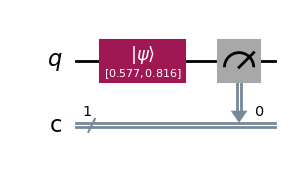

In [7]:
qc = QuantumCircuit(1,1)
qc.initialize([np.sqrt(1/3), np.sqrt(2/3)], 0)
qc.measure(0,0)
qc.draw('mpl')

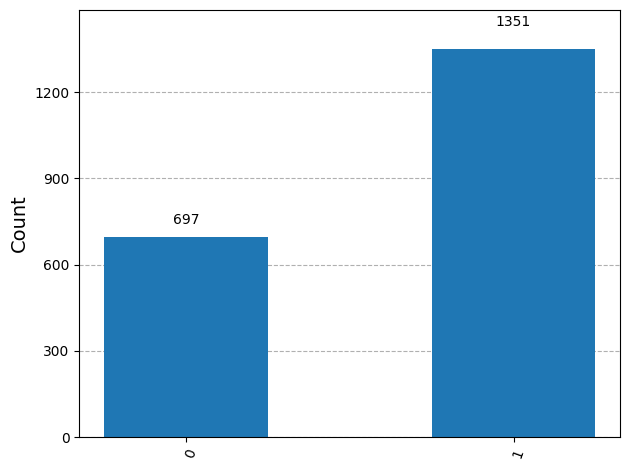

In [8]:
backend = AerSimulator()
job = backend.run(qc, shots = 2048)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [9]:
697+1351

2048

In [10]:
697/2048

0.34033203125

In [11]:
1351/2024

0.6674901185770751

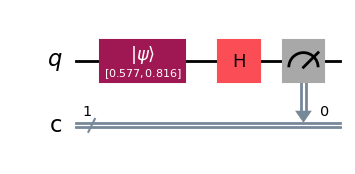

In [12]:
qc = QuantumCircuit(1,1)
qc.initialize([np.sqrt(1/3), np.sqrt(2/3)], 0)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

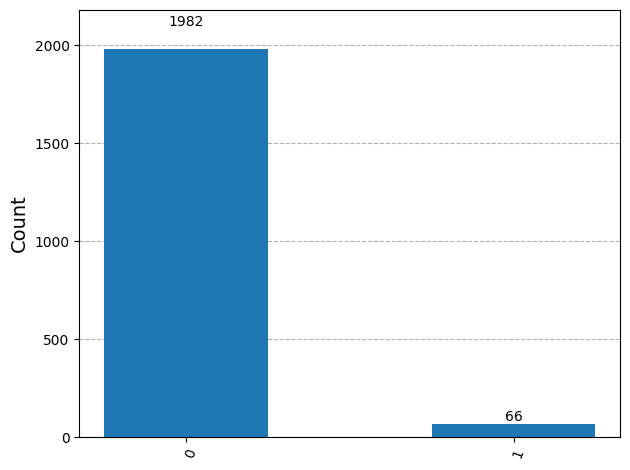

In [27]:
backend = AerSimulator()
job = backend.run(qc, shots = 2048)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [28]:
1982/2024

0.9792490118577075

In [29]:
(3 + 2*np.sqrt(2))/6

np.float64(0.9714045207910317)

In [30]:
66/2024

0.03260869565217391

In [31]:
(3 - 2*np.sqrt(2))/6

np.float64(0.028595479208968284)

In [35]:
from scipy.linalg import expm

In [38]:
Xmat = np.array([[0.0, 1.0], [1.0, 0.0]])
Ymat = np.array([[0.0, -1.0j], [1.0j, 0.0]])
Zmat = np.array([[1.0, 0.0], [0.0, -1.0]])

matA = np.kron(np.kron(Xmat, Zmat), Ymat)

matU = expm(1j * matA)

matUdagger = matU.conj().T

matUdagger = expm(-1j * matA)


In [41]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

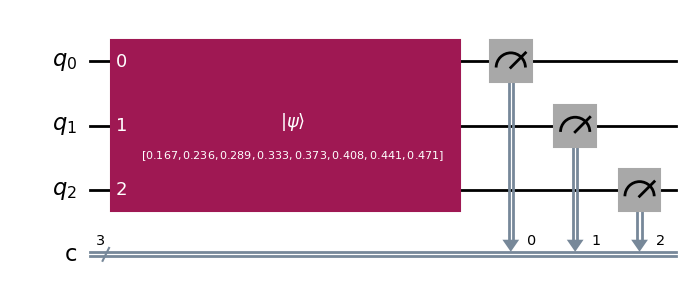

In [47]:
qc = QuantumCircuit(3,3)
qc.initialize([np.sqrt(1/36), np.sqrt(2/36), np.sqrt(3/36), np.sqrt(4/36), np.sqrt(5/36), np.sqrt(6/36), np.sqrt(7/36), np.sqrt(8/36)], range(3))
qc.measure(range(3), range(3))
qc.draw('mpl')

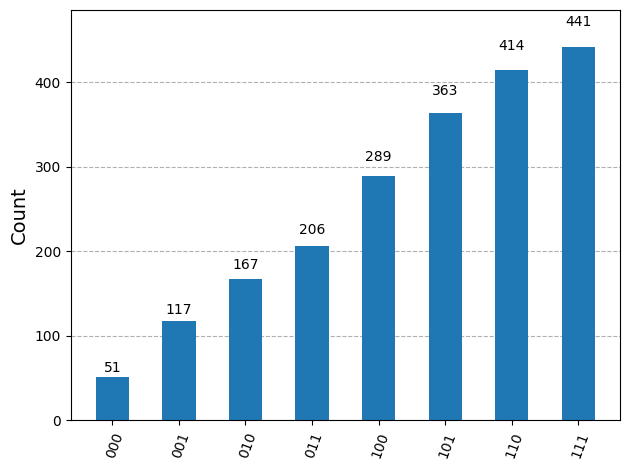

In [48]:
backend = AerSimulator()
job = backend.run(qc, shots = 2048)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

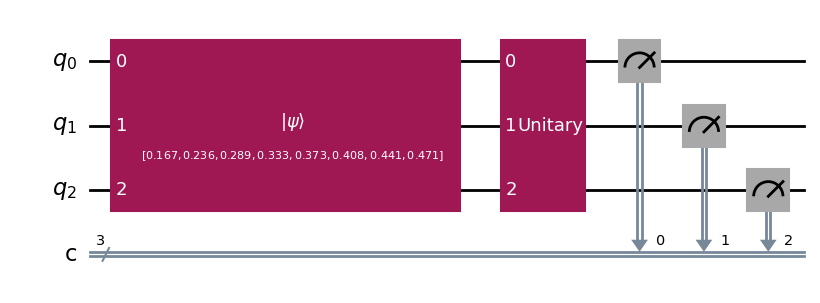

In [49]:
qc = QuantumCircuit(3,3)
qc.initialize([np.sqrt(1/36), np.sqrt(2/36), np.sqrt(3/36), np.sqrt(4/36), np.sqrt(5/36), np.sqrt(6/36), np.sqrt(7/36), np.sqrt(8/36)], range(3))
qc.unitary(matUdagger, range(3))
qc.measure(range(3), range(3))
qc.draw('mpl')

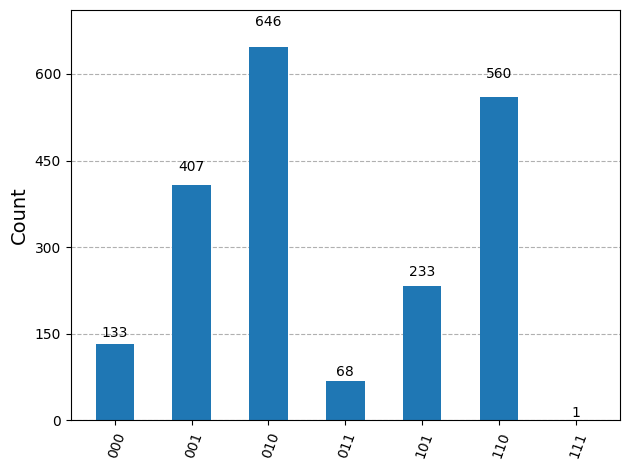

In [50]:
backend = AerSimulator()
job = backend.run(qc, shots = 2048)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [52]:
from qiskit.quantum_info import Statevector

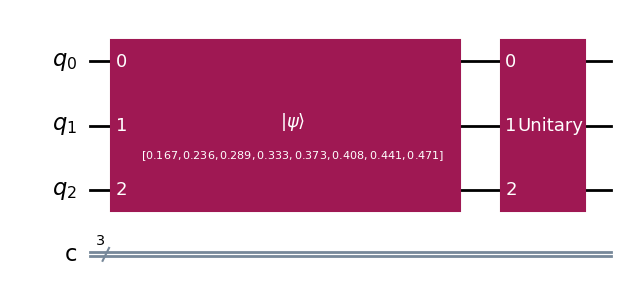

In [54]:
qc = QuantumCircuit(3,3)
qc.initialize([np.sqrt(1/36), np.sqrt(2/36), np.sqrt(3/36), np.sqrt(4/36), np.sqrt(5/36), np.sqrt(6/36), np.sqrt(7/36), np.sqrt(8/36)], range(3))
qc.unitary(matUdagger, range(3))
qc.draw('mpl')

In [55]:
Statevector(qc)

Statevector([-0.25347871+0.j,  0.4409482 +0.j,  0.55264507+0.j,
             -0.19095306+0.j,  0.00302217+0.j,  0.36082266+0.j,
              0.51874125+0.j,  0.0117892 +0.j],
            dims=(2, 2, 2))


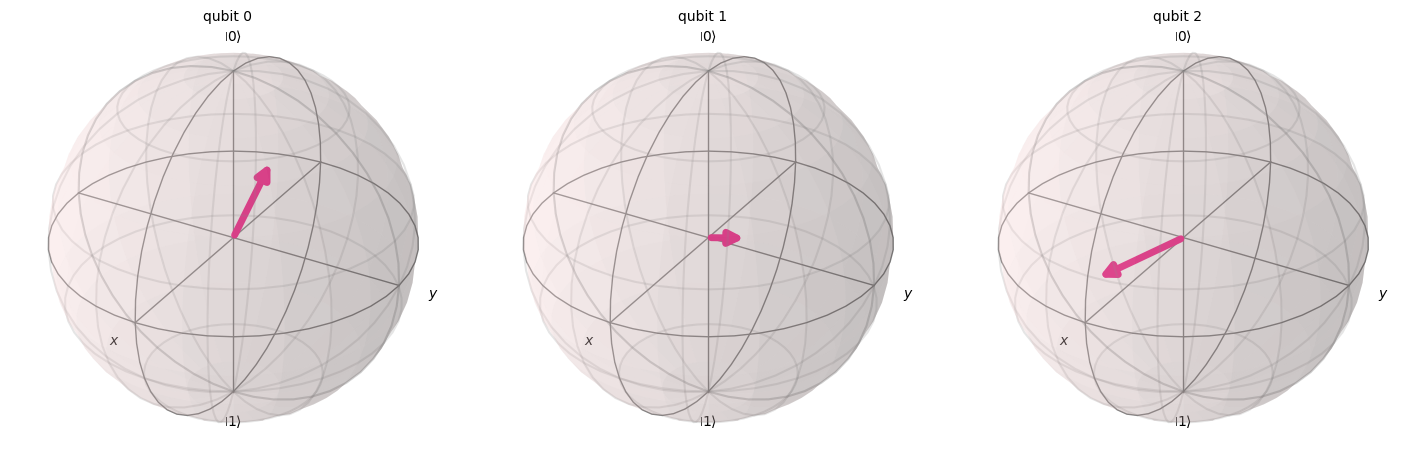

In [56]:
plot_bloch_multivector(Statevector(qc))